# 🔍 Lasso Regression (L1 Regularization)

Lasso Regression is a **regularization technique** used to reduce overfitting in machine learning by shrinking some model coefficients to exactly **zero** — enabling automatic **feature selection**.

---

## 🛠️ Lasso vs Ridge Regression

| Feature              | Ridge Regression (L2)        | Lasso Regression (L1)            |
|----------------------|------------------------------|----------------------------------|
| Penalty Term         | λ × Σ(wᵢ²)                    | λ × Σ|wᵢ|                        |
| Coefficient Behavior | Shrinks towards 0            | Shrinks and can become exactly 0 |
| Feature Selection    | ❌ No                         | ✅ Yes (sparse solution)         |

> ⚠️ Lasso’s penalty term uses **absolute values**, which is the key reason it creates **sparsity**.

---

## 📉 How Lasso Works

### 🔢 Loss Function:

\[
J(\mathbf{w}) = \sum (y_i - \hat{y}_i)^2 + \lambda \sum |w_i|
\]

- **First Term**: Mean Squared Error (MSE)
- **Second Term**: L1 Penalty (adds constraint on sum of absolute weights)

> 📌 This L1 penalty encourages coefficients of **less important features** to shrink **exactly to zero**.

---

## 🎯 Effect of Lambda (α)

- **α = 0** → No regularization (standard linear regression)
- **Small α** → Slight regularization, small coefficients
- **Large α** → Strong regularization, more coefficients become zero

> 🔍 **Key Insight**: Lasso performs **automatic feature selection** by eliminating irrelevant features (driving weights to zero).

---

## 📉 Bias-Variance Trade-off in Lasso

| Lambda (α) | Bias           | Variance       | Model Behavior     |
|------------|----------------|----------------|---------------------|
| Low        | Low            | High           | May overfit         |
| High       | High           | Low            | May underfit        |
| Optimal    | Balanced       | Balanced       | Generalizes well ✅ |

---

## 🧠 Why Lasso Causes Sparsity (1D Case)

For slope `m`, the Lasso Loss includes:

\[
Loss = \text{MSE} + \lambda |m|
\]

Because of the **absolute value**, the gradient of the loss isn't defined at `m = 0`. The optimizer handles this by **case analysis**:

- **If m > 0**: Gradient includes `-λ`, pushing `m` toward zero  
- **If m < 0**: Gradient includes `+λ`, pushing `m` toward zero  
- **If m = 0**: No gradient — model stays at zero  

> 🧮 Once a coefficient reaches 0, Lasso keeps it there!

---

## ❓ Why Ridge Can’t Do This

- Ridge penalty is `λ * m²`
- The slope update is smoothed and continuous
- Even large λ only makes `m` small — **never exactly 0**

### 🧮 Key Difference:

| Method   | λ Position       | Effect                      |
|----------|------------------|-----------------------------|
| Ridge    | In denominator   | Shrinks values              |
| Lasso    | In numerator     | Can zero out values         |

---

## 🔬 Visualization Differences

- **Ridge Loss Curve**: Smooth and circular contours
- **Lasso Loss Curve**: Sharp edges ("angles") at zero, encouraging zeros

---

## ✅ When to Use Lasso Regression

- When you suspect **some features are irrelevant**
- When working with **high-dimensional data**
- When **model interpretability** and **feature selection** matter

---

## 📌 Summary

| Concept             | Lasso Regression Insight                             |
|---------------------|------------------------------------------------------|
| Regularization Type | L1 (absolute values of weights)                      |
| Core Strength       | Feature selection via zeroing coefficients           |
| Ideal Use Case      | High-dimensional models with irrelevant features     |
| Trade-off Control   | Lambda (α): Balance bias and variance                |
| Difference from L2  | Creates sparsity due to sharp cost function corners  |



[27.8174294]
-3.072018705180844


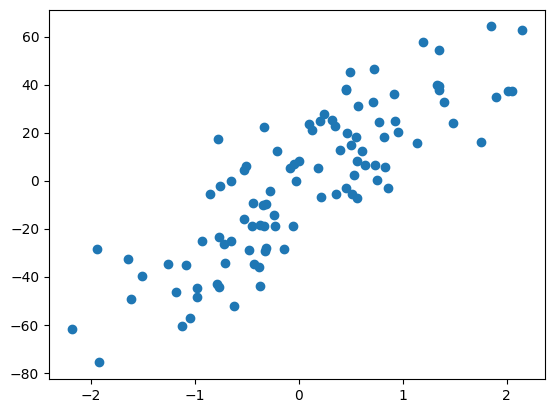

In [9]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split



X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

plt.scatter(X,y)

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train,y_train)
print(reg.coef_)
print(reg.intercept_)



/home/yeaish/ml-core-topics/.venv/lib/python3.13/site-packages/sklearn/base.py:1363: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/home/yeaish/ml-core-topics/.venv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/yeaish/ml-core-topics/.venv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.108e+04, tolerance: 7.344e+00
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/

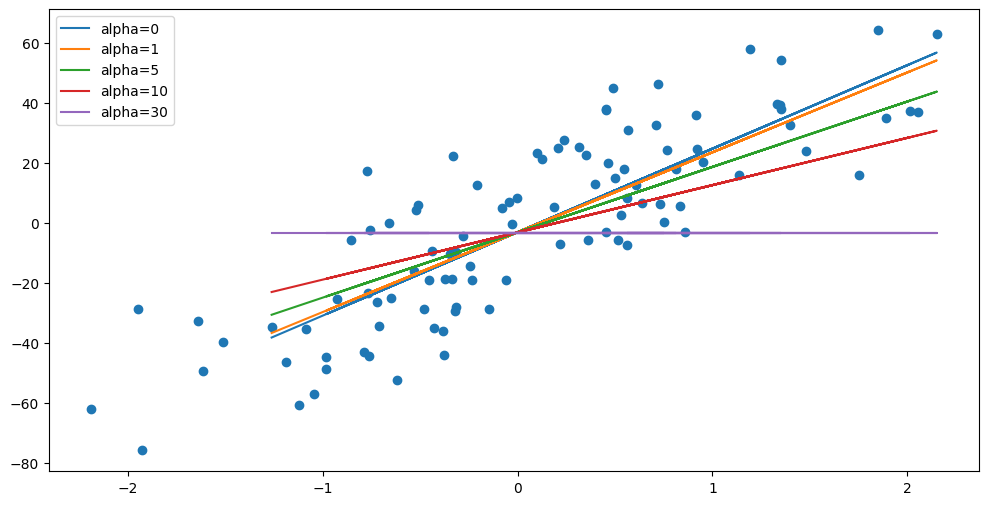

In [10]:


alphas = [0,1,5,10,30]
plt.figure(figsize=(12,6))
plt.scatter(X,y)
for i in alphas:
    L = Lasso(alpha=i)
    L.fit(X_train,y_train)
    plt.plot(X_test,L.predict(X_test),label='alpha={}'.format(i))
plt.legend()
plt.show()
    



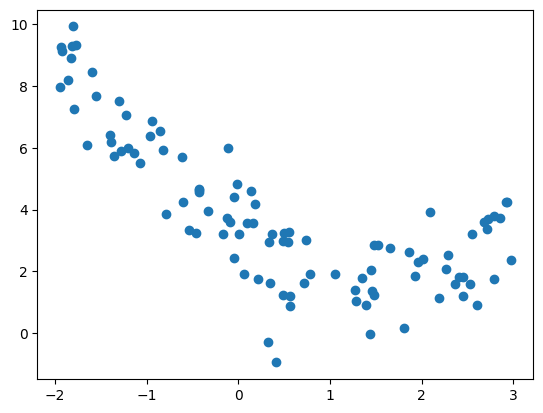

In [11]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

/home/yeaish/ml-core-topics/.venv/lib/python3.13/site-packages/sklearn/base.py:1363: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/home/yeaish/ml-core-topics/.venv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/yeaish/ml-core-topics/.venv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.063e+01, tolerance: 5.955e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/

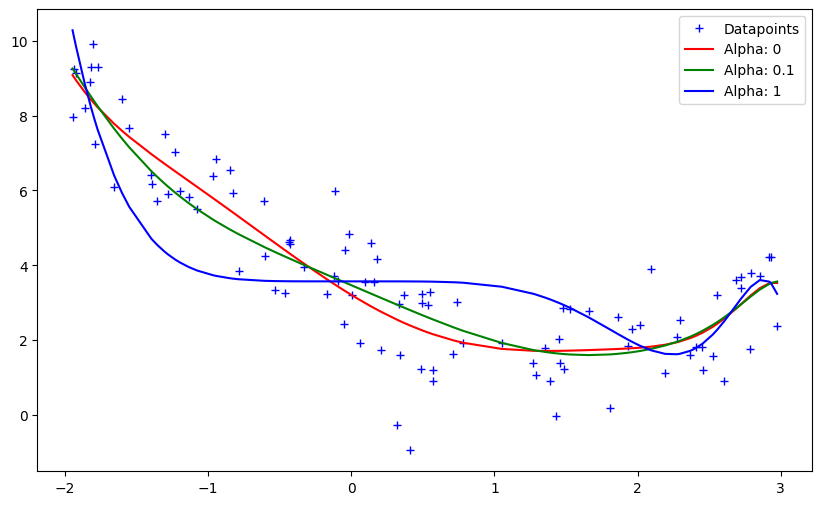

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

def get_preds_lasso(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('lasso', Lasso(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 0.1, 1]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_lasso(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()